# Heart Failure Prediction using Clustering Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib  inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Visualizations of Data

In [7]:
import seaborn as sns

<Figure size 1600x1600 with 0 Axes>

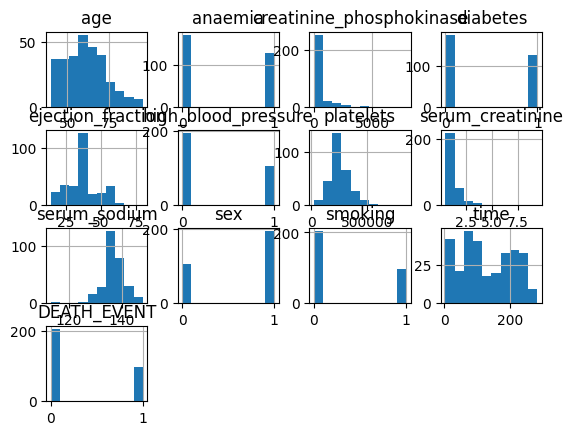

<Figure size 1600x1600 with 0 Axes>

In [8]:
df.hist()
plt.figure(figsize = (16, 16))

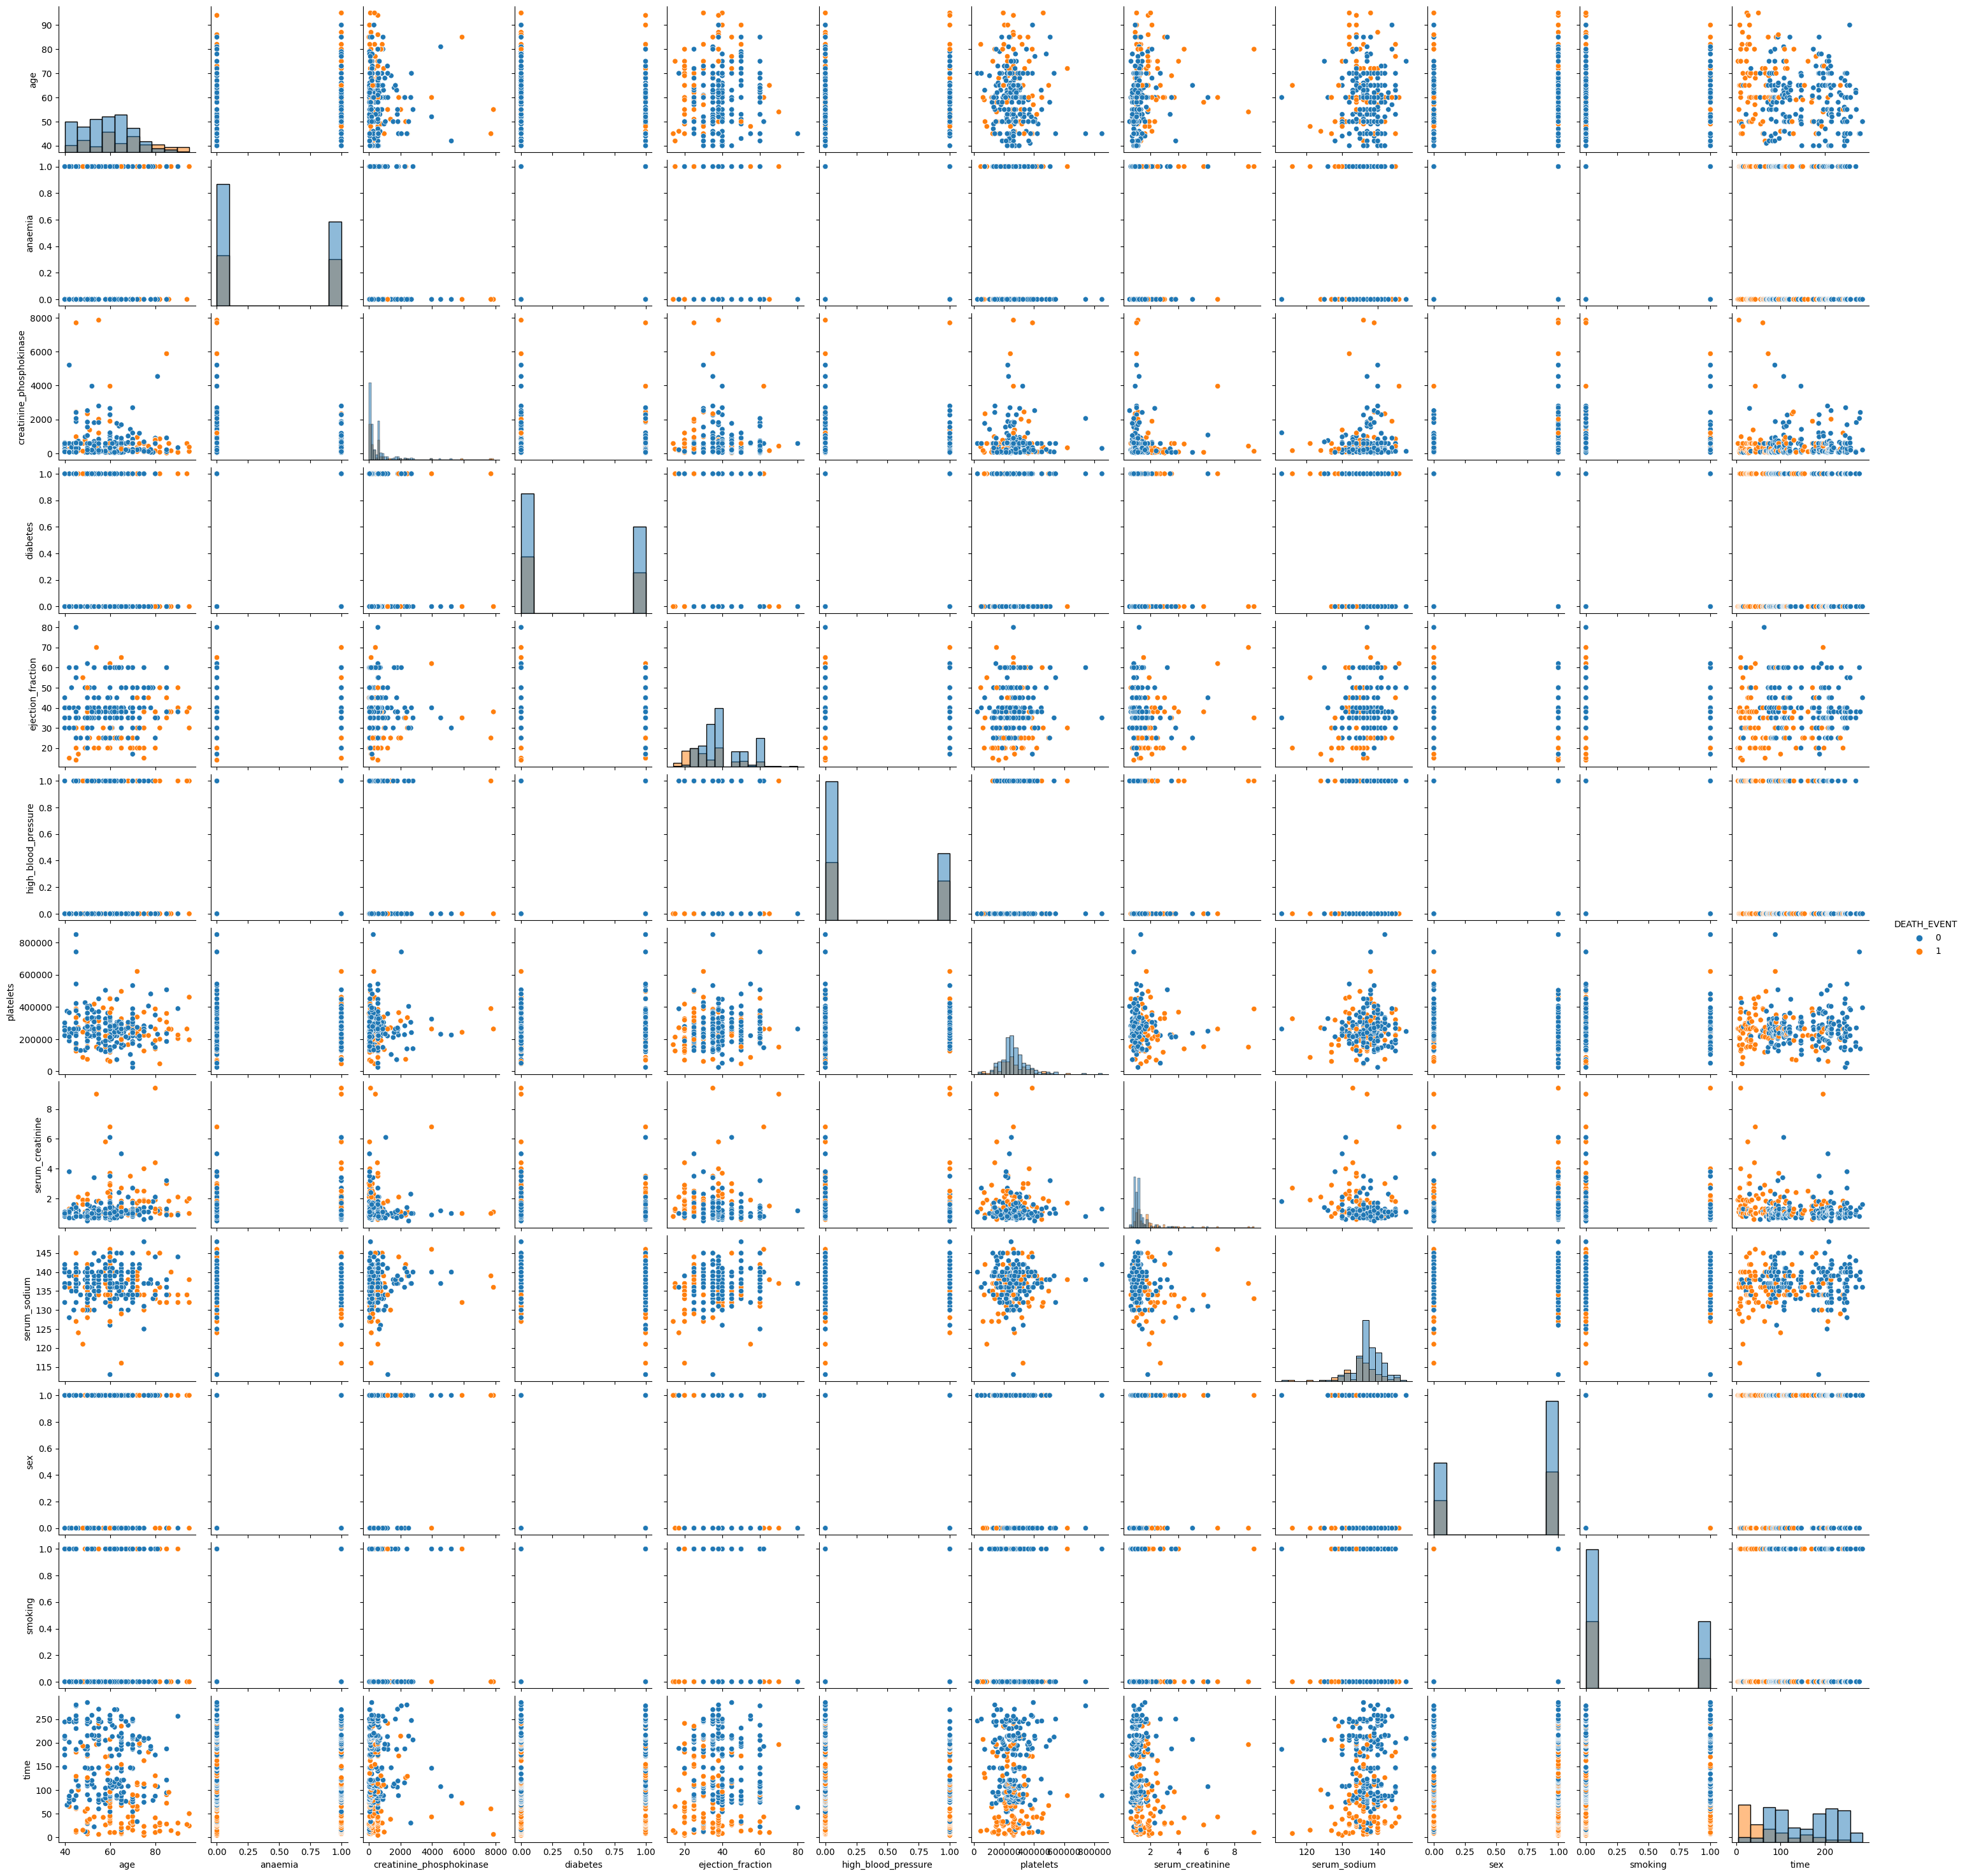

In [9]:
sns.pairplot(df, hue='DEATH_EVENT', diag_kind='hist')

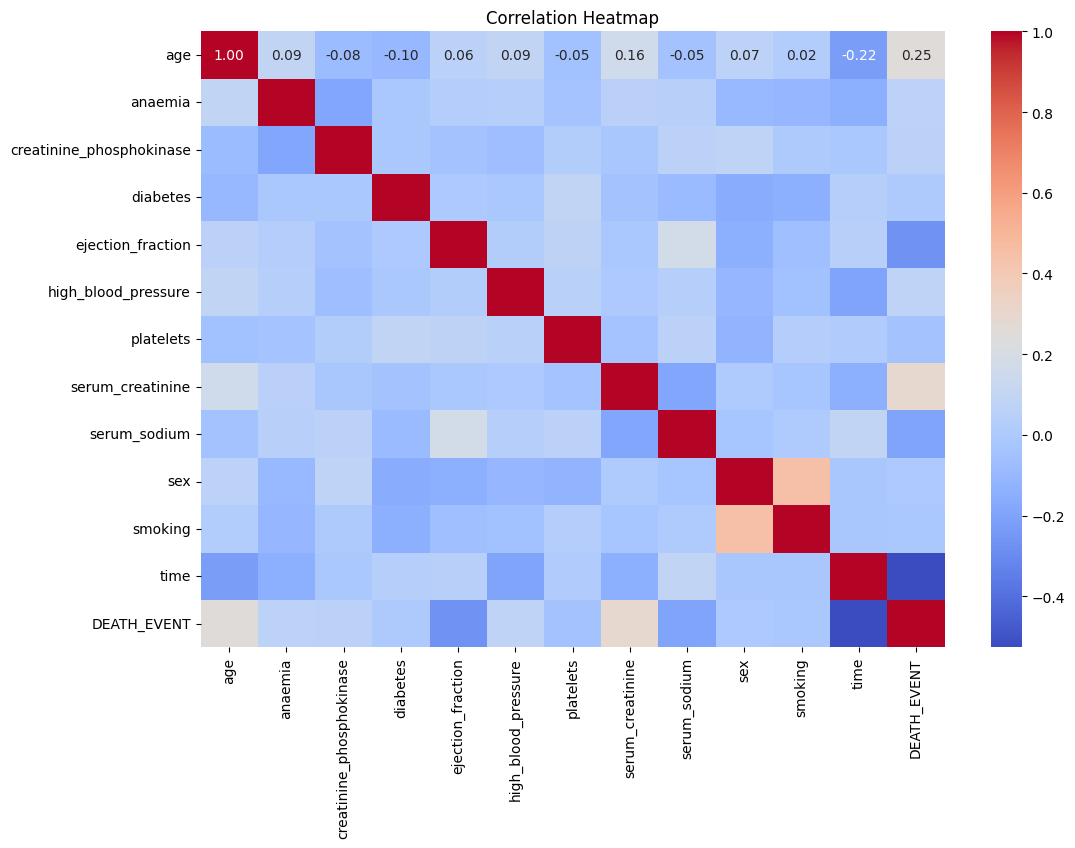

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

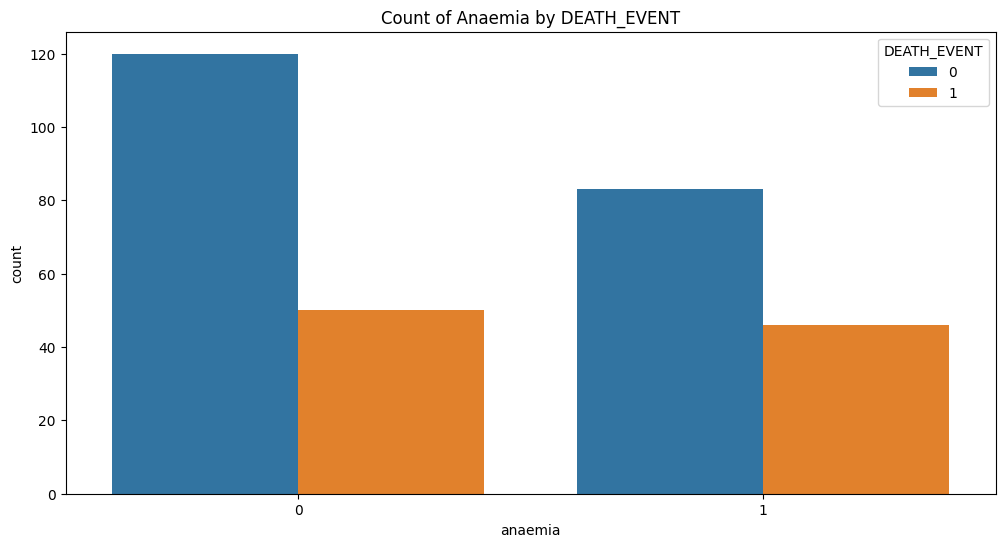

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.title('Count of Anaemia by DEATH_EVENT')
plt.show()

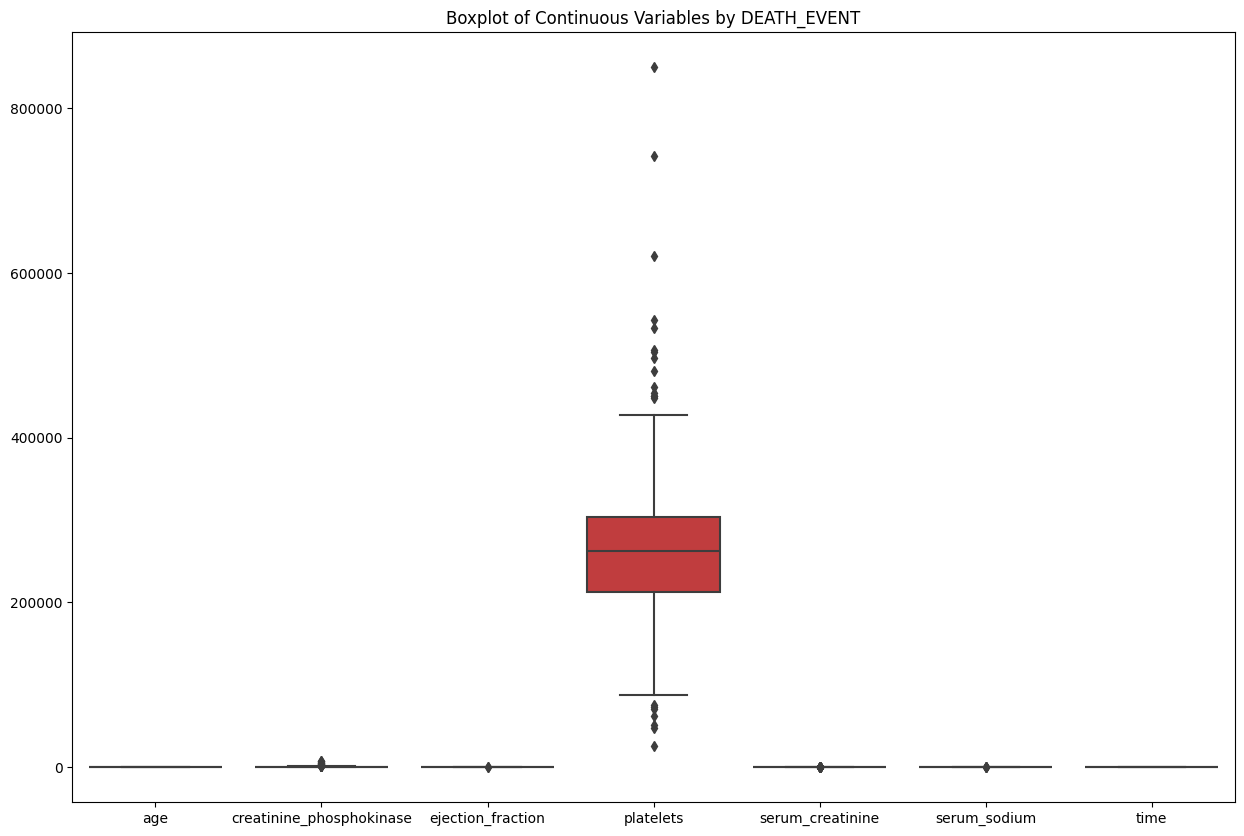

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['DEATH_EVENT', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking'], axis=1))
plt.title('Boxplot of Continuous Variables by DEATH_EVENT')
plt.show()

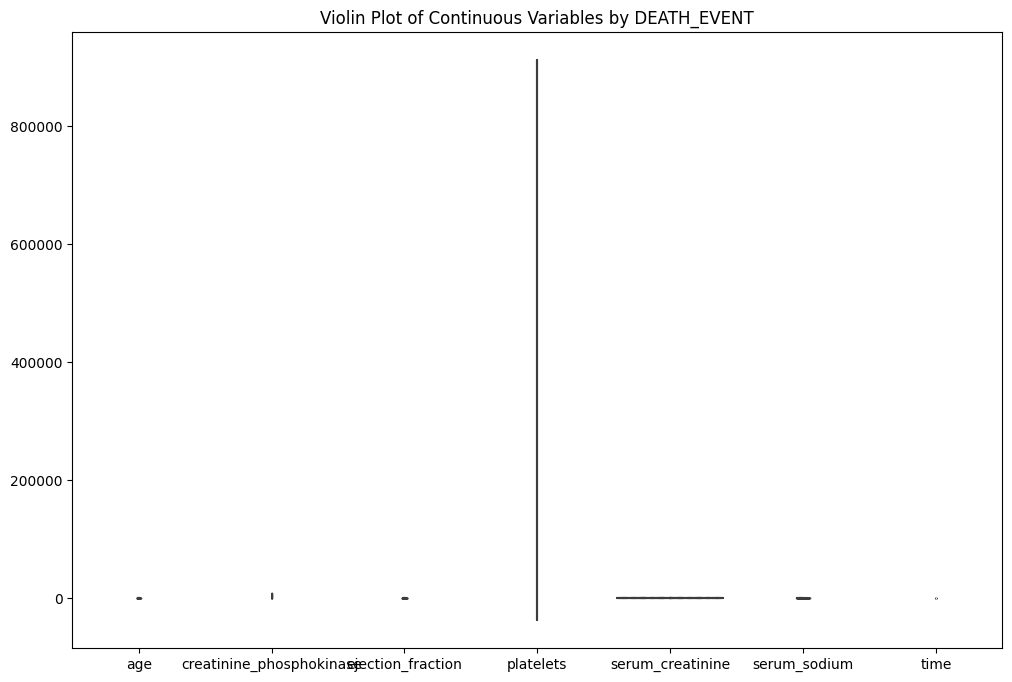

In [13]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df.drop(['DEATH_EVENT', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking'], axis=1), inner='quartile')
plt.title('Violin Plot of Continuous Variables by DEATH_EVENT')
plt.show()

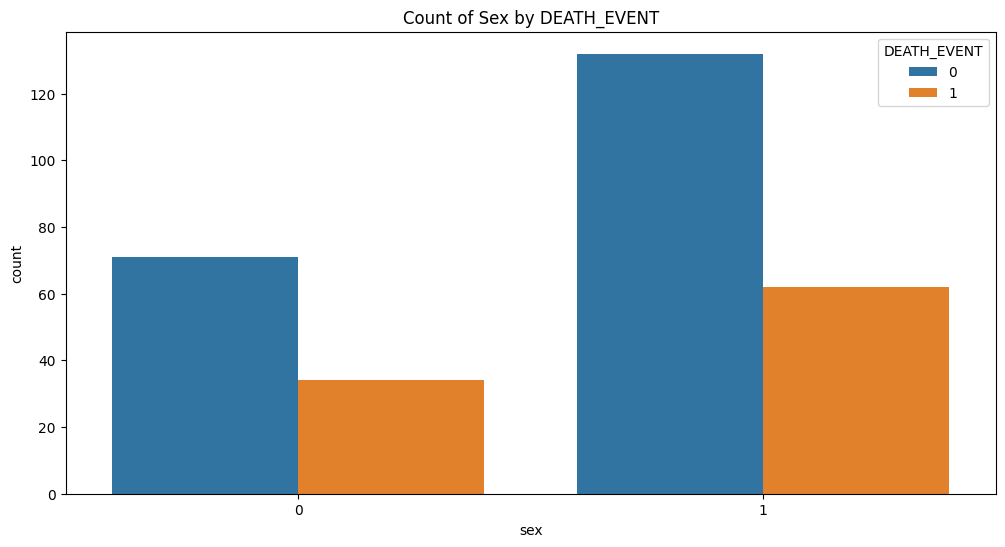

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.title('Count of Sex by DEATH_EVENT')
plt.show()

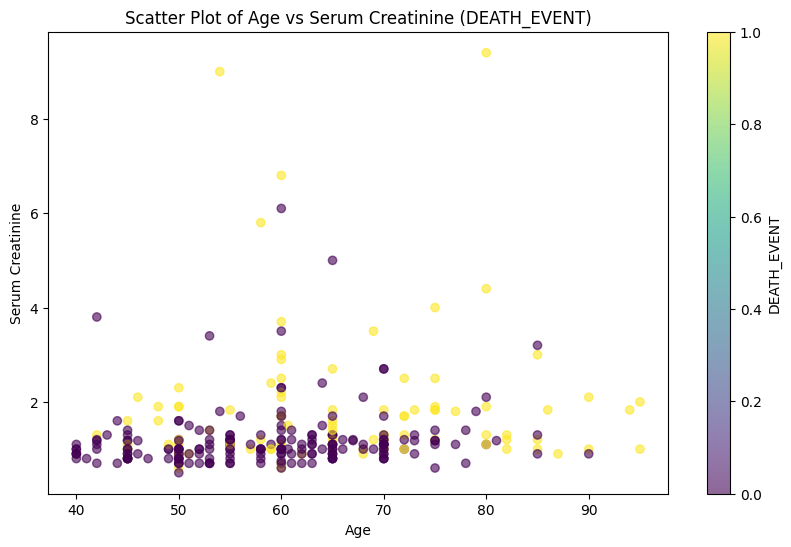

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['serum_creatinine'], c=df['DEATH_EVENT'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.title('Scatter Plot of Age vs Serum Creatinine (DEATH_EVENT)')
plt.colorbar(label='DEATH_EVENT')
plt.show()

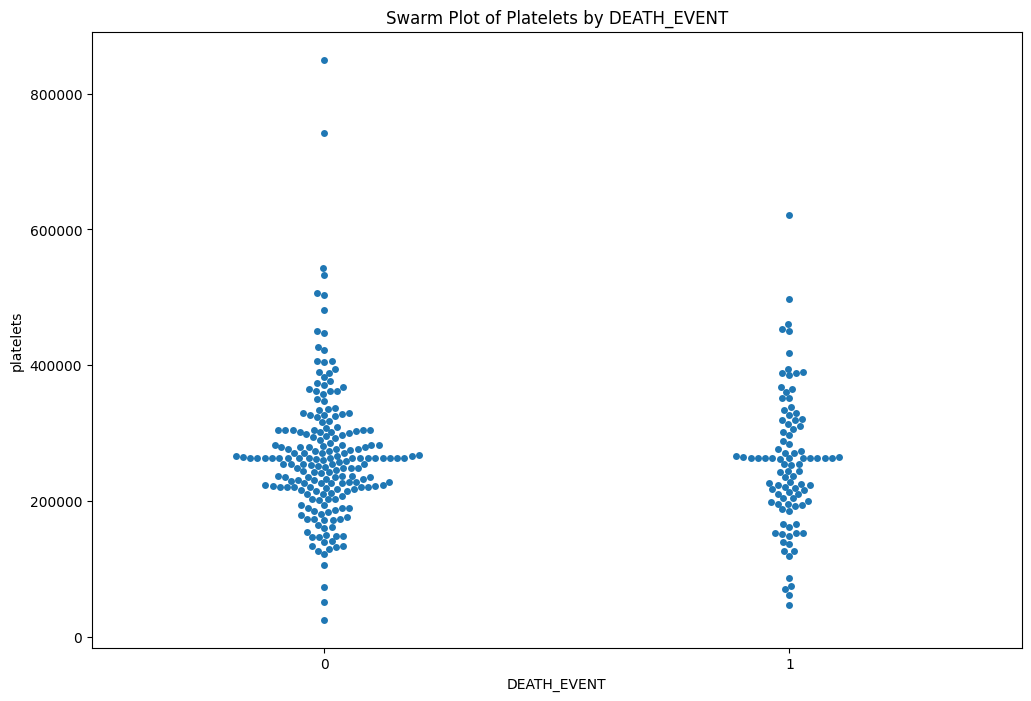

In [16]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='DEATH_EVENT', y='platelets', data=df)
plt.title('Swarm Plot of Platelets by DEATH_EVENT')
plt.show()

## Splitting the data into test and train data by using StandardScaler method

In [17]:
# Splitting features and target
features = df.drop('DEATH_EVENT', axis=1)
target = df['DEATH_EVENT']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


## Applying KMeans Clustering

In [26]:
# Applying KMeans Clustering
ground_truth_labels = ...
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluating KMeans
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette}')


# Calculating Davies-Bouldin Index for KMeans
dbi_kmeans = davies_bouldin_score(scaled_features, kmeans_labels)
print(f'KMeans Davies-Bouldin Index: {dbi_kmeans}')

KMeans Silhouette Score: 0.1178512561512019
KMeans Davies-Bouldin Index: 2.622139436586235


## Applying DBSCAN Clustering

In [27]:
# Applying DBSCAN Clustering
dbscan = DBSCAN(eps = 5, min_samples = 3)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Filter out noise points for silhouette score
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


# Calculating Davies-Bouldin Index for DBSCAN
# Note: Ensure there are more than one cluster to calculate DBI
if len(set(dbscan_labels)) > 1:
    dbi_dbscan = davies_bouldin_score(scaled_features, dbscan_labels)
    print(f'DBSCAN Davies-Bouldin Index: {dbi_dbscan}')
else:
    print('DBSCAN resulted in a single cluster, DBI cannot be calculated.')

DBSCAN Silhouette Score: 0.46861144710828245
DBSCAN Davies-Bouldin Index: 0.994329255204241


## Applying Hierarchical Clustering

In [28]:
hierarchical = AgglomerativeClustering(n_clusters = 4)
hierarchical_labels = hierarchical.fit_predict(scaled_features)


# Evaluating Hierarchical Clustering
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')



# Calculating Davies-Bouldin Index for Hierarchical Clustering
dbi_hierarchical = davies_bouldin_score(scaled_features, hierarchical_labels)
print(f'Hierarchical Clustering Davies-Bouldin Index: {dbi_hierarchical}')

Hierarchical Clustering Silhouette Score: 0.10505551771307976
Hierarchical Clustering Davies-Bouldin Index: 2.181119505146419


## Applying PCA for visualizing the clustered data 

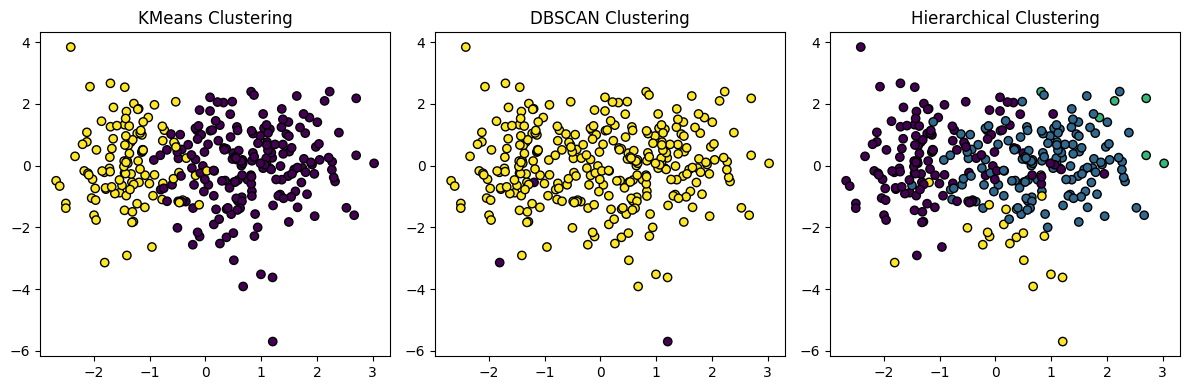

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# KMeans plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering')

# DBSCAN plot
plt.subplot(1, 3, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')

# Hierarchical plot
plt.subplot(1, 3, 3)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()



### Converting Silhouette scores and DBI indices of 3 Clusters for better understanding

In [35]:
data = {
    'Clustering Algorithm': ['KMeans', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'DBI Index': [dbi_kmeans, dbi_dbscan, dbi_hierarchical]
}

df1 = pd.DataFrame(data)

# Print the DataFrame
df1

,Clustering Algorithm,Silhouette Score,DBI Index
0,KMeans,0.117851,2.622139
1,DBSCAN,0.468611,0.994329
2,Hierarchical,0.105056,2.181120


* # PROJECT DESCRIPTION:


    * This project is to classify the heart failure data by 3 clusters on       how well they cluster the data we provide.
    * In the dataset there are 299 rows and 13 columns.
    * Many libraries were imported such as **pandas, sklearn, and from         sklearn libraries related to DBSCAN, KMeans, Hierarchical                 Clustering** are imported.
    * Some visualizations are being done on the data provided.
    * Before splitting the data into training set and testing set,             features in the data are needed to be standardized.
    * Hence for standardizing, **StandardScaler** was used.
    * After standardizing the data each of the clusters are being               implemented.
    * Using **KMeans clustering, Silhouette Score was 0.117851 and DBI           index was 2.622139**.
    * Using **DBSCAN clustering, Silhouette Score was 0.468611 and DBI           index was 0.994329**.
    * Using **Hierarchical clustering, Silhouette Score was 0.105056 and         DBI index was 2.181120**.
    * To determine which clustering algorithm is better based on the           provided silhouette scores and DBI indices, we need to consider the       following:
         * **Silhouette Score**: Higher silhouette scores indicate                   better separation between clusters, with values closer to 1               indicating well-defined clusters and values close to                     -1 indicating overlapping clusters.
         * **Davies-Bouldin Index (DBI)**: Lower DBI values suggest  b               better clustering, where values closer to 0 indicate better               separation and compactness of clusters.
    * Given the provided scores: 
       * **DBSCAN** has the highest silhouette score (0.468611) among the          three algorithms, indicating better separation between                    clusters compared to KMeans and Hierarchical Clustering.
       * **DBSCAN** also has the lowest DBI index (0.994329), suggesting          better separation and compactness of clusters compared to KMeans          and Hierarchical Clustering.
    * Based on these observations, DBSCAN appears to be the better             clustering algorithm among the three for the given dataset. It           achieves higher silhouette score and lower DBI index, indicating         better clustering performance in terms of both cluster separation         and compactness.






